In [1]:
import numpy as np
import pandas as pd
import math

In [2]:
saks_raw = pd.read_csv('saks.csv')

In [3]:
saks_raw.head()

website brand_name                           product_name      category  \
0    Saks       Eton                 Grid Check Dress Shirt  dress-shirts   
1    Saks       Eton  Floral Lightweight Cotton Dress Shirt  dress-shirts   
2    Saks      Isaia         Leuca Linen-Cotton Dress Shirt  dress-shirts   
3    Saks      Isaia                    Gingham Dress Shirt  dress-shirts   
4    Saks       Eton                      Check Dress Shirt  dress-shirts   

  department  original_price  discount_price  
0        men           250.0           175.0  
1        men           295.0           206.5  
2        men           765.0           382.5  
3        men           495.0           247.5  
4        men           250.0           175.0

In [4]:
saks_raw['category'].value_counts()

dresses                      3207
casual-button-down-shirts     477
dress-shirts                  319
Name: category, dtype: int64

In [5]:
saks_raw.loc[saks_raw['category']=='dress-shirts','order'] = (range(1,np.sum(saks_raw['category']=='dress-shirts')+1))
saks_raw.loc[saks_raw['category']=='dresses','order'] = (range(1,np.sum(saks_raw['category']=='dresses')+1))
saks_raw.loc[saks_raw['category']=='casual-button-down-shirts','order'] = (range(1,np.sum(saks_raw['category']=='casual-button-down-shirts')+1))                                                       
saks_raw.loc[:,'order'] = saks_raw['order'].astype(int)

In [7]:
np.sum(saks_raw.isnull())

website            0
brand_name         0
product_name       0
category           0
department         0
original_price    11
discount_price     0
order              0
dtype: int64

In [8]:
saks_raw.shape

(4003, 8)

In [138]:
saks = saks_raw.loc[~saks_raw['original_price'].isnull()]

In [139]:
saks = saks.loc[saks['original_price']>saks['discount_price']]

In [140]:
saks.shape

(3989, 8)

In [11]:
pd.set_option('display.max_rows', 200)

In [141]:
saks['brand_name'].value_counts(ascending=False)

Eton                  175
Saks Fifth Avenue      89
Alice + Olivia         76
Theory                 66
Rebecca Taylor         62
                     ... 
Alberta Ferretti        1
Nanette Lepore          1
Cotton Citizen          1
Runway Marc Jacobs      1
Gottex Swim             1
Name: brand_name, Length: 324, dtype: int64

In [142]:
saks.loc[:,'percent_off'] = round((1-saks['discount_price']/saks['original_price'])*100,2)

In [143]:
saks.describe()

original_price  discount_price        order  percent_off
count     3989.000000     3989.000000  3989.000000  3989.000000
mean       815.819128      343.363021  1322.842818    55.881662
std        926.902825      377.108027   997.230684     8.528339
min         89.500000       39.200000     1.000000     0.000000
25%        299.000000      140.000000   342.000000    50.000000
50%        495.000000      198.000000  1203.000000    60.000000
75%        860.000000      370.000000  2200.000000    60.000000
max       8990.000000     3596.000000  3200.000000    65.000000

In [144]:
saks.loc[saks['percent_off']<10]

website brand_name                                       product_name  \
301     Saks      Isaia               Regular-Fit Mixed-Stripe Dress Shirt   
3856    Saks       HUGO                 Ermann Relax-Fit Plaid Sport Shirt   
3857    Saks       HUGO                     Ero Abstract Print Sport Shirt   
3859    Saks       HUGO                        Enver Flannel Checker Shirt   
3860    Saks       HUGO             Ero Extra Slim-Fit Graphic Crowd Shirt   
3932    Saks       HUGO                        Empson Confetti Print Shirt   
3933    Saks       HUGO             Ero Extra Slim-Fit Degrade Print Shirt   
3934    Saks       HUGO                   Ero Relax-Fit Floral Print Shirt   
3935    Saks       HUGO                          Ero Relax-Fit Plaid Shirt   
3936    Saks       HUGO            Eddison Relax-Fit Mandarin Collar Shirt   
3937    Saks       HUGO               Extra Slim-Fit Geometric Print Shirt   
3938    Saks       HUGO                     Ero Relax-Fit Bear Print Shirt   
3939    Saks       HUGO  Erondo Extra Slim-Fit Geometric Print Dress Shirt   

                       category department  original_price  discount_price  \
301                dress-shirts        men           475.0          474.99   
3856  casual-button-down-shirts        men           118.0          117.99   
3857  casual-button-down-shirts        men           128.0          127.99   
3859  casual-button-down-shirts        men           148.0          147.99   
3860  casual-button-down-shirts        men           138.0          137.99   
3932  casual-button-down-shirts        men           128.0          127.99   
3933  casual-button-down-shirts        men           158.0          157.99   
3934  casual-button-down-shirts        men           148.0          147.99   
3935  casual-button-down-shirts        men           158.0          157.99   
3936  casual-button-down-shirts        men           128.0          127.99   
3937  casual-button-down-shirts        men           128.0          127.99   
3938  casual-button-down-shirts        men           128.0          127.99   
3939  casual-button-down-shirts        men           138.0          137.99   

      order  percent_off  
301     302         0.00  
3856    331         0.01  
3857    332         0.01  
3859    334         0.01  
3860    335         0.01  
3932    407         0.01  
3933    408         0.01  
3934    409         0.01  
3935    410         0.01  
3936    411         0.01  
3937    412         0.01  
3938    413         0.01  
3939    414         0.01

In [145]:
saks

website          brand_name                            product_name  \
0       Saks                Eton                  Grid Check Dress Shirt   
1       Saks                Eton   Floral Lightweight Cotton Dress Shirt   
2       Saks               Isaia          Leuca Linen-Cotton Dress Shirt   
3       Saks               Isaia                     Gingham Dress Shirt   
4       Saks                Eton                       Check Dress Shirt   
...      ...                 ...                                     ...   
3998    Saks  Brunello Cucinelli              Chevron Twill Cotton Shirt   
3999    Saks         The Kooples         Casual Cotton Button-Down Shirt   
4000    Saks   Ermenegildo Zegna             Palm Leaf Button-Down Shirt   
4001    Saks       Robert Graham  Diamente Tonal Print Button-Down Shirt   
4002    Saks            Eleventy                   Cotton Chambray Shirt   

                       category department  original_price  discount_price  \
0                  dress-shirts        men           250.0          175.00   
1                  dress-shirts        men           295.0          206.50   
2                  dress-shirts        men           765.0          382.50   
3                  dress-shirts        men           495.0          247.50   
4                  dress-shirts        men           250.0          175.00   
...                         ...        ...             ...             ...   
3998  casual-button-down-shirts        men           495.0          247.49   
3999  casual-button-down-shirts        men           185.0           74.00   
4000  casual-button-down-shirts        men           395.0          197.49   
4001  casual-button-down-shirts        men           178.0           71.20   
4002  casual-button-down-shirts        men           195.0           97.50   

      order  percent_off  
0         1         30.0  
1         2         30.0  
2         3         50.0  
3         4         50.0  
4         5         30.0  
...     ...          ...  
3998    473         50.0  
3999    474         60.0  
4000    475         50.0  
4001    476         60.0  
4002    477         50.0  

[3989 rows x 9 columns]

In [146]:
len(saks.loc[saks['brand_name']=='Saks Fifth Avenue'])

89

In [147]:
saks.loc[saks['brand_name']=='Saks Fifth Avenue','private_label'] = 'Private Label'

In [148]:
saks.loc[saks['brand_name']!='Saks Fifth Avenue','private_label'] = 'Non-Private'

In [149]:
saks['private_label'].value_counts()

Non-Private      3900
Private Label      89
Name: private_label, dtype: int64

In [150]:
saks.head()

website brand_name                           product_name      category  \
0    Saks       Eton                 Grid Check Dress Shirt  dress-shirts   
1    Saks       Eton  Floral Lightweight Cotton Dress Shirt  dress-shirts   
2    Saks      Isaia         Leuca Linen-Cotton Dress Shirt  dress-shirts   
3    Saks      Isaia                    Gingham Dress Shirt  dress-shirts   
4    Saks       Eton                      Check Dress Shirt  dress-shirts   

  department  original_price  discount_price  order  percent_off private_label  
0        men           250.0           175.0      1         30.0   Non-Private  
1        men           295.0           206.5      2         30.0   Non-Private  
2        men           765.0           382.5      3         50.0   Non-Private  
3        men           495.0           247.5      4         50.0   Non-Private  
4        men           250.0           175.0      5         30.0   Non-Private

In [151]:
saks_men = saks.loc[saks['department']=='men']
saks_women = saks.loc[saks['department']!='men']
unisex_brands = list(set.intersection(set(saks_men['brand_name'].unique()),set(saks_women['brand_name'].unique())))

In [152]:
unisex_brands

['Saks Fifth Avenue',
 'The Kooples',
 '3.1 Phillip Lim',
 'Helmut Lang',
 'Brunello Cucinelli',
 'Ksubi',
 'Polo Ralph Lauren',
 'Rag & Bone',
 'Saint Laurent',
 'Balenciaga',
 'Giorgio Armani',
 'Theory',
 'Emporio Armani',
 'Kenzo',
 'Valentino']

In [153]:
saks_uni = saks.loc[saks['brand_name'].map(lambda b: b in unisex_brands)]
saks_men = saks.loc[(saks['department']=='men') & (saks['brand_name'].map(lambda b: b not in unisex_brands))]
saks_women = saks.loc[(saks['department']!='men') & (saks['brand_name'].map(lambda b: b not in unisex_brands))]

men_brand_price = saks_men.groupby('brand_name').mean()[['original_price']].sort_values(by='original_price')
women_brand_price = saks_women.groupby('brand_name').mean()[['original_price']].sort_values(by='original_price')
uni_brand_price = saks_uni.groupby('brand_name').mean()[['original_price']].sort_values(by='original_price')

In [154]:
men_brand_price.describe()

original_price
count       42.000000
mean       352.527978
std        214.564642
min        119.000000
25%        186.583333
50%        275.000000
75%        485.500000
max        911.521739

In [198]:
men_brand_price.loc[men_brand_price['original_price']<=150,'brand_positioning'] = 'Trendy'
men_brand_price.loc[(men_brand_price['original_price']>150) & (men_brand_price['original_price']<400),'brand_positioning'] = 'Contemporary'
men_brand_price.loc[men_brand_price['original_price']>=400,'brand_positioning'] = 'Luxury'

In [197]:
men_brand_price

original_price brand_positioning
brand_name                                                 
Barbour                        119.000000            Trendy
Lacoste                        125.000000            Trendy
Onia                           132.500000            Trendy
HUGO                           134.538462            Trendy
Peter Millar                   147.250000            Trendy
Madison Supply                 161.333333            Trendy
Nominee                        162.000000            Trendy
Ike Behar                      175.000000            Trendy
John Varvatos Star U.S.A.      183.000000            Trendy
Sunspel                        185.000000            Trendy
G/Fore                         185.000000            Trendy
John Varvatos                  191.333333      Contemporary
Robert Graham                  204.875000      Contemporary
Etudes                         215.000000      Contemporary
A.P.C.                         230.000000      Contemporary
Eidos                          255.625000      Contemporary
Orlebar Brown                  260.000000      Contemporary
Eton                           260.457143      Contemporary
Officine Generale              263.333333      Contemporary
Canali                         265.731707      Contemporary
Paul & Shark                   275.000000      Contemporary
Z Zegna                        275.000000      Contemporary
AMI Paris                      275.000000      Contemporary
Eleventy                       282.500000      Contemporary
Corneliani                     310.625000      Contemporary
Boglioli                       321.250000      Contemporary
Roi Du Lac                     326.000000      Contemporary
John Elliott                   331.333333      Contemporary
Paul Smith                     331.666667      Contemporary
Ermenegildo Zegna              424.472727      Contemporary
Ralph Lauren Purple Label      457.000000      Contemporary
Versace Jeans Couture          495.000000            Luxury
Neil Barrett                   505.000000            Luxury
Isaia                          533.272727            Luxury
Loro Piana                     575.000000            Luxury
Charvet                        585.000000            Luxury
Thom Browne                    662.500000            Luxury
Marcelo Burlon                 701.666667            Luxury
Versace                        760.000000            Luxury
Palm Angels                    805.000000            Luxury
Brioni                         806.388889            Luxury
Kiton                          911.521739            Luxury

In [157]:
women_brand_price.describe()

original_price
count      267.000000
mean      1110.627755
std       1119.671926
min         98.000000
25%        383.357143
50%        645.000000
75%       1644.000000
max       7425.000000

In [196]:
women_brand_price.loc[women_brand_price['original_price']<=200,'brand_positioning'] = 'Trendy'
women_brand_price.loc[(women_brand_price['original_price']>200) & (women_brand_price['original_price']<1000),'brand_positioning'] = 'Contemporary'
women_brand_price.loc[women_brand_price['original_price']>=1000,'brand_positioning'] = 'Luxury'

In [195]:
women_brand_price.tail(100)

original_price brand_positioning
brand_name                                               
M Missoni                    975.714286      Contemporary
Unravel Project              980.000000      Contemporary
Piazza Sempione             1002.692308      Contemporary
REDValentino                1064.583333      Contemporary
Alexander Wang              1072.500000      Contemporary
Rokh                        1077.000000      Contemporary
Rosetta Getty               1078.333333      Contemporary
Wandering                   1093.833333      Contemporary
Agua By Agua Bendita        1125.000000      Contemporary
Zimmermann                  1131.250000      Contemporary
Black Iris                  1145.833333      Contemporary
Moschino                    1177.500000      Contemporary
Akris punto                 1210.277778      Contemporary
Jacquemus                   1210.666667      Contemporary
UNTTLD                      1240.000000      Contemporary
Rick Owens                  1245.000000      Contemporary
Isabel Marant               1285.000000      Contemporary
Haney                       1291.250000      Contemporary
Diane von Furstenberg       1298.000000      Contemporary
Derek Lam                   1330.000000      Contemporary
David Koma                  1386.666667      Contemporary
Runway Marc Jacobs          1400.000000      Contemporary
Attico                      1411.000000      Contemporary
St. John                    1416.951220      Contemporary
Off-White                   1418.888889      Contemporary
Cushnie                     1438.333333      Contemporary
Rosie Assoulin              1445.000000      Contemporary
Marni                       1496.666667      Contemporary
Victoria Beckham            1519.500000      Contemporary
Safiyaa                     1555.000000      Contemporary
Adriana Iglesias            1598.000000      Contemporary
Rachel Gilbert              1619.000000      Contemporary
Magda Butrym                1641.000000      Contemporary
Emilio Pucci                1647.000000            Luxury
Silvia Tcherassi            1664.000000            Luxury
Comme des Garcons           1691.666667            Luxury
Lela Rose                   1694.444444            Luxury
Escada                      1698.000000            Luxury
Herve Leger                 1725.000000            Luxury
Rene Ruiz Collection        1728.333333            Luxury
Sacai                       1770.714286            Luxury
Stella McCartney            1792.777778            Luxury
Altuzarra                   1803.333333            Luxury
Adam Lippes                 1823.333333            Luxury
Zac Posen                   1840.000000            Luxury
Proenza Schouler            1862.173913            Luxury
Prabal Gurung               1870.000000            Luxury
Dries Van Noten             1879.285714            Luxury
Khaite                      1880.000000            Luxury
Talbot Runhof               1888.400000            Luxury
Loewe                       1900.000000            Luxury
Alejandra Alonso Rojas      1920.000000            Luxury
Moncler Genius              1985.000000            Luxury
Amen                        1987.411765            Luxury
Etro                        1997.777778            Luxury
The Row                     2001.428571            Luxury
Marina Moscone              2010.000000            Luxury
Galvan                      2036.666667            Luxury
Gustavo Cadile              2073.571429            Luxury
Nina Ricci                  2116.666667            Luxury
Michael Kors Collection     2152.400000            Luxury
Paco Rabanne                2175.000000            Luxury
Alberta Ferretti            2195.000000            Luxury
CDGNY by CD Greene          2200.000000            Luxury
Carolina Herrera            2202.903226            Luxury
Givenchy                    2213.333333            Luxury
Jason Wu Collection         2218.181818            Luxury
Balmain                

In [225]:
women_brand_price['brand_positioning'].value_counts()

Contemporary    156
Luxury           98
Trendy           13
Name: brand_positioning, dtype: int64

In [199]:
uni_brand_price

original_price brand_positioning
brand_name                                          
Polo Ralph Lauren       173.755319            Trendy
Saks Fifth Avenue       192.202247            Trendy
Ksubi                   240.000000            Trendy
Emporio Armani          301.388889            Trendy
The Kooples             343.437500      Contemporary
Theory                  345.227273      Contemporary
Rag & Bone              360.967742      Contemporary
Helmut Lang             429.722222      Contemporary
Kenzo                   498.125000      Contemporary
3.1 Phillip Lim         657.692308      Contemporary
Giorgio Armani          821.923077            Luxury
Brunello Cucinelli     1029.827586            Luxury
Balenciaga             1890.000000            Luxury
Saint Laurent          2290.000000            Luxury
Valentino              3567.352941            Luxury

In [200]:
uni_brand_price.loc[uni_brand_price['original_price']<=320,'brand_positioning'] = 'Trendy'
uni_brand_price.loc[(uni_brand_price['original_price']>320) & (uni_brand_price['original_price']<800),'brand_positioning'] = 'Contemporary'
uni_brand_price.loc[uni_brand_price['original_price']>=800,'brand_positioning'] = 'Luxury'

In [201]:
uni_brand_price

original_price brand_positioning
brand_name                                          
Polo Ralph Lauren       173.755319            Trendy
Saks Fifth Avenue       192.202247            Trendy
Ksubi                   240.000000            Trendy
Emporio Armani          301.388889            Trendy
The Kooples             343.437500      Contemporary
Theory                  345.227273      Contemporary
Rag & Bone              360.967742      Contemporary
Helmut Lang             429.722222      Contemporary
Kenzo                   498.125000      Contemporary
3.1 Phillip Lim         657.692308      Contemporary
Giorgio Armani          821.923077            Luxury
Brunello Cucinelli     1029.827586            Luxury
Balenciaga             1890.000000            Luxury
Saint Laurent          2290.000000            Luxury
Valentino              3567.352941            Luxury

In [202]:
saks_men = pd.merge(saks, men_brand_price.reset_index(), on='brand_name')
saks_women = pd.merge(saks, women_brand_price.reset_index(), on='brand_name')
saks_uni = pd.merge(saks, uni_brand_price.reset_index(), on='brand_name')

In [203]:
saks_full = pd.concat([saks_men,saks_women,saks_uni],ignore_index=True)

In [204]:
saks_full.columns

Index(['website', 'brand_name', 'product_name', 'category', 'department',
       'original_price_x', 'discount_price', 'order', 'percent_off',
       'private_label', 'original_price_y', 'brand_positioning'],
      dtype='object')

In [205]:
saks_full = saks_full.rename(columns={'original_price_y':'brand_mean','original_price_x':'original_price'})

In [206]:
saks_full.head()

website brand_name                                    product_name  \
0    Saks       Eton                          Grid Check Dress Shirt   
1    Saks       Eton           Floral Lightweight Cotton Dress Shirt   
2    Saks       Eton                               Check Dress Shirt   
3    Saks       Eton  Contemporary-Fit Linen-Blend Check Dress Shirt   
4    Saks       Eton                     Vertical Stripe Dress Shirt   

       category department  original_price  discount_price  order  \
0  dress-shirts        men           250.0           175.0      1   
1  dress-shirts        men           295.0           206.5      2   
2  dress-shirts        men           250.0           175.0      5   
3  dress-shirts        men           295.0           206.5      6   
4  dress-shirts        men           225.0           157.5      7   

   percent_off private_label  brand_mean brand_positioning  
0         30.0   Non-Private  260.457143      Contemporary  
1         30.0   Non-Private  260.457143      Contemporary  
2         30.0   Non-Private  260.457143      Contemporary  
3         30.0   Non-Private  260.457143      Contemporary  
4         30.0   Non-Private  260.457143      Contemporary

In [207]:
saks_full['brand_positioning'].value_counts()

Contemporary    2585
Luxury          1104
Trendy           300
Name: brand_positioning, dtype: int64

In [208]:
for feature in ['original_price','discount_price','percent_off','order']:
    print(saks_full.groupby('brand_positioning').agg(['mean','std','min','max'])[[feature]])

                  original_price                            
                            mean          std    min     max
brand_positioning                                           
Contemporary          459.059574   216.098834  108.0  1995.0
Luxury               1821.540761  1256.103736  345.0  8990.0
Trendy                188.841667    75.286459   89.5   825.0
                  discount_price                            
                            mean         std    min      max
brand_positioning                                           
Contemporary          195.806747   89.073936   51.2   797.99
Luxury                755.959149  507.170512  122.5  3596.00
Trendy                 96.452500   36.818501   39.2   330.00
                  percent_off                         
                         mean        std    min    max
brand_positioning                                     
Contemporary        56.394213   7.965171  25.00  60.01
Luxury              56.895625   6.941053   0.00 

In [209]:
for feature in ['original_price','discount_price','percent_off']:
    print(saks_full.groupby('category').agg(['mean','std','min','max'])[[feature]])

                          original_price                           
                                    mean         std    min     max
category                                                           
casual-button-down-shirts     336.743187  314.647296   89.5  4995.0
dress-shirts                  332.542320  155.379543  128.0  1195.0
dresses                       935.670216  992.079388   98.0  8990.0
                          discount_price                           
                                    mean         std    min     max
category                                                           
casual-button-down-shirts     179.833962  206.553729  44.75  3496.5
dress-shirts                  180.859248   85.097437  64.00   597.5
dresses                       384.027620  402.865853  39.20  3596.0
                          percent_off                         
                                 mean        std    min    max
category                                                  

In [210]:
saks_full.groupby(['category','brand_positioning']).agg(['count','mean','std','min','max'])[['original_price']]

original_price               \
                                                     count         mean   
category                  brand_positioning                               
casual-button-down-shirts Contemporary                 183   235.021858   
                          Luxury                       136   655.816176   
                          Trendy                       158   179.914557   
dress-shirts              Contemporary                 181   268.066298   
                          Luxury                        90   530.388889   
                          Trendy                        48   204.708333   
dresses                   Contemporary                2221   493.084196   
                          Luxury                       878  2134.458998   
                          Trendy                        94   195.744681   

                                                                         
                                                     std    min     max  
category                  brand_positioning                              
casual-button-down-shirts Contemporary         60.619599  128.0   475.0  
                          Luxury              440.526036  345.0  4995.0  
                          Trendy               63.478799   89.5   398.0  
dress-shirts              Contemporary         30.066889  175.0   350.0  
                          Luxury              161.711749  350.0  1195.0  
                          Trendy               52.093189  128.0   395.0  
dresses                   Contemporary        213.801751  108.0  1995.0  
                          Luxury             1213.268997  490.0  8990.0  
                          Trendy               98.668985   98.0   825.0

In [211]:
saks_full.groupby(['category','brand_positioning']).agg(['count','mean','std','min','max'])[['discount_price']]

discount_price              \
                                                     count        mean   
category                  brand_positioning                              
casual-button-down-shirts Contemporary                 183  117.642514   
                          Luxury                       136  359.205074   
                          Trendy                       158   97.470443   
dress-shirts              Contemporary                 181  153.024586   
                          Luxury                        90  277.073889   
                          Trendy                        48  105.416667   
dresses                   Contemporary                2221  205.733638   
                          Luxury                       878  866.503827   
                          Trendy                        94   90.164043   

                                                                          
                                                    std     min      max  
category                  brand_positioning                               
casual-button-down-shirts Contemporary        43.803582   51.20   285.00  
                          Luxury             317.491932  138.25  3496.50  
                          Trendy              35.297708   44.75   278.60  
dress-shirts              Contemporary        30.991288   78.00   241.50  
                          Luxury              97.080632  122.50   597.50  
                          Trendy              30.791566   64.00   197.50  
dresses                   Contemporary        90.821012   58.00   797.99  
                          Luxury             496.844657  196.00  3596.00  
                          Trendy              41.141584   39.20   330.00

In [212]:
saks_full.groupby(['category','brand_positioning']).agg(['count','mean','std','min','max'])[['percent_off']]

percent_off                        \
                                                  count       mean        std   
category                  brand_positioning                                     
casual-button-down-shirts Contemporary              183  50.546448  12.122397   
                          Luxury                    136  47.058824  10.082449   
                          Trendy                    158  44.494430  14.951901   
dress-shirts              Contemporary              181  42.923039   9.756984   
                          Luxury                     90  47.944444   8.476486   
                          Trendy                     48  48.750000   4.892461   
dresses                   Contemporary             2221  57.973872   5.828304   
                          Luxury                    878  59.336868   2.908502   
                          Trendy                     94  52.659787  10.892930   

                                                           
                                               min    max  
category                  brand_positioning                
casual-button-down-shirts Contemporary       30.00  60.00  
                          Luxury             30.00  65.00  
                          Trendy              0.01  60.00  
dress-shirts              Contemporary       30.00  60.00  
                          Luxury              0.00  65.00  
                          Trendy             30.00  50.00  
dresses                   Contemporary       25.00  60.01  
                          Luxury             40.00  60.00  
                          Trendy             30.00  60.00

In [50]:
import plotly
plotly.offline.init_notebook_mode(connected=True)

In [51]:
from plotly.graph_objs import Figure, Histogram, Layout

min_ = saks_full['original_price'].min()
max_ = saks_full['original_price'].max()

data = [Histogram(x=saks_full['original_price'], 
                  xbins=dict(start=min_,
                             end=max_,
                             size=(max_-min_)/20))]
layout = Layout(title="Histogram of clothing item original price on Saks.com",
                bargap=0.1,
               xaxis_title = 'Original Price',
               yaxis_title = 'Count')
fig = Figure(data=data, layout=layout)

plotly.offline.iplot(fig, show_link=False, image_width=300, image_height=400)

In [52]:
min_ = saks_full['percent_off'].min()
max_ = saks_full['percent_off'].max()

data = [Histogram(x=saks_full['percent_off'], 
                  xbins=dict(start=20,
                             end=max_,
                             size=(max_-min_)/10))]
layout = Layout(title="Histogram of clothing item discount percent on Saks.com",
                bargap=0.1,
               xaxis_title = 'Discount Percent Off',
               yaxis_title = 'Count')
fig = Figure(data=data, layout=layout)

plotly.offline.iplot(fig, show_link=False, image_width=600, image_height=400)

In [213]:
import plotly.figure_factory as ff

contemporary = saks_full.loc[saks_full['brand_positioning']=='Contemporary']['original_price']
trendy = saks_full.loc[saks_full['brand_positioning']=='Trendy']['original_price']
luxury = saks_full.loc[saks_full['brand_positioning']=='Luxury']['original_price']

hist_data = [trendy, contemporary, luxury]
group_labels = ['Trendy', 'Contemporary', 'Luxury']
colors = ['rgb(25, 43, 87)', 'rgb(240, 188, 84)', 'rgb(166, 164, 161)']

fig = ff.create_distplot(hist_data, group_labels, bin_size=75, colors= colors)
fig.update_layout(title_text='Items Original Price Distribution On Saks.com By Brand Type',plot_bgcolor='rgb(256, 256, 256)')
fig.update_xaxes(title_text = "Price(USD)")
fig.update_yaxes(showgrid=True, gridwidth=0.5, gridcolor='rgb(230, 230, 230)')

fig.show()

In [214]:
import plotly.express as px
colors = ['rgb(25, 43, 87)', 'rgb(201, 161, 91)', 'rgb(166, 164, 161)']
fig = px.box(saks_full, x="brand_positioning", y="original_price", points=False, 
             color_discrete_sequence = ['rgb(25, 43, 87)','rgb(240, 188, 84)', 'rgb(166, 164, 161)'],
             color_discrete_map = {"brand_positioning": ["Trendy", "Contemporary", "Luxury"]})
#              color_discrete_map={'Trendy':'rgb(25, 43, 87)',
#                                  'Contemporary':'rgb(201, 161, 91)',
#                                  'Luxury':'rgb(166, 164, 161)'
#                                  })

fig.update_layout(title_text='Price By Brand Type',plot_bgcolor='rgb(256, 256, 256)')
fig.update_xaxes(title_text = "")
# fig.update_yaxes(showgrid=True, gridwidth=0.5, gridcolor='rgb(230, 230, 230)')
fig.show()

In [215]:
import plotly.figure_factory as ff

contemporary = saks_full.loc[saks_full['brand_positioning']=='Contemporary']['discount_price']
trendy = saks_full.loc[saks_full['brand_positioning']=='Trendy']['discount_price']
luxury = saks_full.loc[saks_full['brand_positioning']=='Luxury']['discount_price']

hist_data = [trendy, contemporary, luxury]
group_labels = ['Trendy', 'Contemporary', 'Luxury']
colors = ['rgb(25, 43, 87)', 'rgb(240, 188, 84)', 'rgb(166, 164, 161)']

fig = ff.create_distplot(hist_data, group_labels, bin_size=30, colors= colors)
fig.update_layout(title_text='Items Discount Price Distribution On Saks.com By Brand Type',plot_bgcolor='rgb(256, 256, 256)')
fig.update_xaxes(title_text = "Price(USD)") 
fig.update_yaxes(showgrid=True, gridwidth=0.5, gridcolor='rgb(230, 230, 230)')

fig.show()

In [216]:
colors = ['rgb(25, 43, 87)', 'rgb(201, 161, 91)', 'rgb(166, 164, 161)']
fig = px.box(saks_full, x="brand_positioning", y="discount_price", points='outliers')
#              color_discrete_sequence = ['rgb(25, 43, 87)','rgb(240, 188, 84)', 'rgb(166, 164, 161)'],
#              color_discrete_map = {"brand_positioning": ["Trendy", "Contemporary", "Luxury"]})
#              color_discrete_map={'Trendy':'rgb(25, 43, 87)',
#                                  'Contemporary':'rgb(201, 161, 91)',
#                                  'Luxury':'rgb(166, 164, 161)'
#                                  })

fig.update_layout(title_text='Price By Brand Type',plot_bgcolor='rgb(256, 256, 256)')
fig.update_xaxes(title_text = "")
fig.update_yaxes(showgrid=True, gridwidth=0.5, gridcolor='rgb(230, 230, 230)')
fig.show()

In [239]:
saks_melt = pd.melt(saks_full,id_vars=['brand_name','product_name','category','brand_positioning','private_label'],value_vars=['original_price','discount_price','percent_off'])

In [240]:
saks_melt.head()

brand_name                                    product_name      category  \
0       Eton                          Grid Check Dress Shirt  dress-shirts   
1       Eton           Floral Lightweight Cotton Dress Shirt  dress-shirts   
2       Eton                               Check Dress Shirt  dress-shirts   
3       Eton  Contemporary-Fit Linen-Blend Check Dress Shirt  dress-shirts   
4       Eton                     Vertical Stripe Dress Shirt  dress-shirts   

  brand_positioning private_label        variable  value  
0      Contemporary   Non-Private  original_price  250.0  
1      Contemporary   Non-Private  original_price  295.0  
2      Contemporary   Non-Private  original_price  250.0  
3      Contemporary   Non-Private  original_price  295.0  
4      Contemporary   Non-Private  original_price  225.0

[Text(0, 0.5, ''),
 Text(0.5, 0, ''),
 Text(0.5, 1.0, 'Clothing Average Price on Saks.com By Brand Type')]

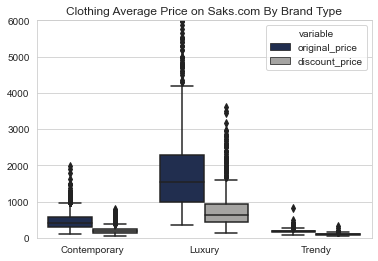

In [259]:
import seaborn as sns

sns.set_style("whitegrid")

ax = sns.boxplot(x="brand_positioning", y="value", hue="variable", 
                 data=saks_melt.loc[saks_melt['variable']!='percent_off'], 
                 palette=['#192b57','#a6a4a1'])
ax.set(ylim=(0, 6000))
ax.set(ylabel='',xlabel='',title = 'Clothing Average Price on Saks.com By Brand Type')

In [258]:
fig = ax.get_figure()
fig.savefig("avg_saks_price.png")

In [217]:
import plotly.express as px

fig = px.parallel_categories(saks_full.iloc[:,1:], color="percent_off", color_continuous_scale=px.colors.sequential.Cividis)
fig.show()

In [218]:
import plotly.express as px

fig = px.scatter(saks_full, x="original_price", y="percent_off", color="brand_positioning",
                 hover_data=['brand_name'], 
                 color_discrete_sequence = ['rgb(25, 43, 87)','rgb(240, 188, 84)', 'rgb(166, 164, 161)'],
                 color_discrete_map = {"brand_positioning": ["Trendy", "Contemporary", "Luxury"]})
fig.update_layout(title_text="Scatter Plot for Original Price and Discount Percent",plot_bgcolor='rgb(256, 256, 256)')
fig.update_yaxes(title_text = 'Discount Percent',showgrid=True, gridwidth=0.5, gridcolor='rgb(230, 230, 230)')
fig.update_xaxes(title_text = "Price(USD)") 

fig.show()

In [219]:
saks_full['brand_positioning'].value_counts()

Contemporary    2585
Luxury          1104
Trendy           300
Name: brand_positioning, dtype: int64

In [226]:
import plotly.graph_objects as go

labels = ['Trendy','Contemporary','Luxury']
values = [300, 2585, 1104]
colors = ['rgb(25, 43, 87)','rgb(240, 188, 84)','rgb(220, 220, 220)']
fig = go.Figure(data=[go.Pie(labels=labels, values=values)])
fig.update_traces(hoverinfo='label+value', textinfo='percent',
                  marker=dict(colors=colors))
fig.show()

In [62]:
saks_full['private_label'].value_counts()

Non-Private      3900
Private Label      89
Name: private_label, dtype: int64

In [76]:
import plotly.graph_objects as go

labels = ['Private Label','Non-Private']
values = [89, 3900]
colors = ['rgb(25, 43, 87)','rgb(220, 220, 220)'] #'rgb(201, 161, 91)',
fig = go.Figure(data=[go.Pie(labels=labels, values=values)])
fig.update_traces(hoverinfo='label+value', textinfo='percent',
                  marker=dict(colors=colors))
fig.show()

In [222]:
saks_full['category'].value_counts()

dresses                      3193
casual-button-down-shirts     477
dress-shirts                  319
Name: category, dtype: int64

In [180]:
import plotly.graph_objects as go

labels = ['dresses','casual-button-down-shirts','dress-shirts']
values = [3193, 477, 319]
colors = ['rgb(247, 146, 171)','rgb(173, 245, 100)','rgb(167, 197, 209)']
fig = go.Figure(data=[go.Pie(labels=labels, values=values)])
fig.update_traces(hoverinfo='label+value', textinfo='percent',
                  marker=dict(colors=colors))
fig.show()

In [223]:
colors = ['rgb(247, 146, 171)','rgb(173, 245, 100)','rgb(167, 197, 209)']
labels = ['dresses','casual-button-down-shirts']
fig = px.box(saks_full, x="category", y="original_price", points='outliers', 
             color_discrete_sequence = colors,
#              color_discrete_map = {"category": labels})
             color_discrete_map={'Trendy':'rgb(25, 43, 87)',
                                 'Contemporary':'rgb(201, 161, 91)',
                                 'Luxury':'rgb(166, 164, 161)'
                                 })

fig.update_layout(title_text='Price By Category',plot_bgcolor='rgb(256, 256, 256)')
fig.update_xaxes(title_text = "")
fig.update_yaxes(showgrid=True, gridwidth=0.5, gridcolor='rgb(230, 230, 230)')
fig.show()

In [224]:
saks_full['product_name'].tolist()

['Grid Check Dress Shirt',
 'Floral Lightweight Cotton Dress Shirt',
 'Check Dress Shirt',
 'Contemporary-Fit Linen-Blend Check Dress Shirt',
 'Vertical Stripe Dress Shirt',
 'Slim-Fit Micro-Print Dress Shirt',
 'Contemporary-Fit Micro Floral Dress Shirt',
 'Contemporary-Fit Medallion-Trim Dress Shirt',
 'Slim-Fit Check Shirt With Tonal Buttons',
 'Contemporary-Fit Check Cotton-Blend Dress Shirt',
 'Soft Casual Slim-Fit Cotton-Blend Shirt',
 'Soft Casual Slim-Fit Paisley Chambray Shirt',
 'Slim-Fit Check Cotton-Blend Dress Shirt',
 'Contemporary-Fit Dobby Woven Cotton Dress Shirt',
 'Contemporary-Fit Plaid Cotton-Blend Dress Shirt',
 'Slim-Fit Plaid Cotton Dress Shirt',
 'Slim-Fit Cotton Dress Shirt',
 'Contemporary-Fit Cotton Dress Shirt',
 'Slim-Fit Medallion-Print Cotton Dress Shirt',
 'Slim-Fit City Scene-Print Cotton Dress Shirt',
 'Slim-Fit Flower Medallion-Print Dress Shirt',
 'Slim-Fit Vibrant Paisley-Print Dress Shirt',
 'Slim-Fit Micro-Print Cotton Dress Shirt',
 'Contemporar

In [185]:
saks_dresses = saks_full.loc[saks_full['category']=='dresses']

In [186]:
saks_dresses.head()

website      brand_name                  product_name category  \
558    Saks  Rebecca Taylor     Talita Short-Sleeve Dress  dresses   
559    Saks  Rebecca Taylor            Zadie Jersey Dress  dresses   
560    Saks  Rebecca Taylor      Gaelle Ruffle Mini Dress  dresses   
561    Saks  Rebecca Taylor     Double Gauze Tiered Dress  dresses   
562    Saks  Rebecca Taylor  Striped Tie-Waist Midi Dress  dresses   

          department  original_price  discount_price  order  percent_off  \
558  women-s-apparel           250.0           150.0      1         40.0   
559  women-s-apparel           295.0           177.0      6         40.0   
560  women-s-apparel           295.0           177.0      8         40.0   
561  women-s-apparel           225.0           135.0      9         40.0   
562  women-s-apparel           495.0           297.0     19         40.0   

    private_label  brand_mean brand_positioning  
558   Non-Private  471.935484      Contemporary  
559   Non-Private  471.935484      Contemporary  
560   Non-Private  471.935484      Contemporary  
561   Non-Private  471.935484      Contemporary  
562   Non-Private  471.935484      Contemporary

In [188]:
import plotly.express as px

fig = px.parallel_categories(saks_dresses.iloc[:,6:], color="order", color_continuous_scale=px.colors.sequential.Cividis)
fig.show()

In [97]:
import sklearn
from sklearn.feature_extraction.text import CountVectorizer
#create the countvectorizer obj
cnt_vec = CountVectorizer()
cnt_vec_data = cnt_vec.fit_transform(yourTextSeriesHere)
#to create the features for text as a separate dataframe
df = pd.DataFrame(cnt_vec_data.todense(), columns=cnt_vec.get_feature_names())

dresses                      322
casual-button-down-shirts      3
Name: category, dtype: int64

The calbulated percentage off is actuall 1% more than the on page discount tag: it seems the webpage is using truncate instead of rounding, so in most cases it round down 1%. 

In [234]:
saks_counts = saks_full.groupby(['category','brand_positioning']).count()['website'].reset_index()
saks_counts

category brand_positioning  website
0  casual-button-down-shirts      Contemporary      183
1  casual-button-down-shirts            Luxury      136
2  casual-button-down-shirts            Trendy      158
3               dress-shirts      Contemporary      181
4               dress-shirts            Luxury       90
5               dress-shirts            Trendy       48
6                    dresses      Contemporary     2221
7                    dresses            Luxury      878
8                    dresses            Trendy       94

In [236]:
import plotly.express as px

fig = px.sunburst(saks_counts, path=['category','brand_positioning'], values='website',color='brand_positioning')
fig.show()

In [266]:
set(saks_full['brand_name'].unique().tolist())

{'3.1 Phillip Lim',
 '7 For All Mankind',
 'A.L.C.',
 'A.P.C.',
 'ABS, Plus Size',
 'AMI Paris',
 'AMUR',
 'ATM Anthony Thomas Melillo',
 'Acler',
 'Acne Studios',
 'Adam Lippes',
 'Adriana Iglesias',
 'Agua By Agua Bendita',
 'Ahluwalia',
 'Aidan Mattox',
 'Aidan by Aidan Mattox',
 'Akris',
 'Akris punto',
 'Alaïa',
 'Alberta Ferretti',
 'Alejandra Alonso Rojas',
 'Alessandra Rich',
 'Alexander McQueen',
 'Alexander Wang',
 'Alexandre Vauthier',
 'Alexis',
 'Alice + Olivia',
 'Alice + Olivia Jeans',
 'Alice McCall',
 'All Things Mochi',
 'Altuzarra',
 'Amen',
 'Andamane',
 'Attico',
 'BCBGMAXAZRIA',
 'BOSS',
 'Badgley Mischka',
 'Bailey 44',
 'Balenciaga',
 'Balmain',
 'Banjanan',
 'Barbour',
 'Basix Black Label',
 'Baum und Pferdgarten',
 'Beatrice B',
 'Bella Dahl',
 'Black Halo',
 'Black Iris',
 'Boglioli',
 'Borgo de Nor',
 'Brandon Maxwell',
 'Brioni',
 'Brunello Cucinelli',
 'Burberry',
 'Burnett New York',
 'By Any Other Name',
 'CDGNY by CD Greene',
 'Camilla',
 'Canali',
 'Ca

In [267]:
saks_full.to_csv('saks_processed.csv',index=False)